In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('extra-task1.csv', delimiter=';')
# Нужно поменять формат разделителя дробной части: запятую на точку, и перевести это в числовой формат
for col in '<OPEN>','<HIGH>','<LOW>','<CLOSE>':
    data[col] = data[col].map(lambda s: float(s.replace(',', '.')))

data.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SPFB.RTS-12.18,1,27.09.2018,10:01,114280.0,114710.0,114200.0,114580.0,3486
1,SPFB.RTS-12.18,1,27.09.2018,10:02,114580.0,114730.0,114520.0,114570.0,2200
2,SPFB.RTS-12.18,1,27.09.2018,10:03,114570.0,114750.0,114560.0,114730.0,1254
3,SPFB.RTS-12.18,1,27.09.2018,10:04,114720.0,114790.0,114620.0,114670.0,1342
4,SPFB.RTS-12.18,1,27.09.2018,10:05,114690.0,114790.0,114650.0,114740.0,1091


In [52]:
# Выбрать строки по каждой из дат и создать отдельный DataFrame для них
dataframes = []
for date in '27.09.2018','29.10.2018','27.11.2018','04.12.2018':
    divided_date_data = data[data['<DATE>'] == date]
    df = pd.DataFrame(divided_date_data, columns=['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']).assign(Date=date)
    dataframes.append(df)

In [53]:
# Подготовка данных для создания диаграммы
cdf = pd.concat(dataframes)
mdf = pd.melt(cdf, id_vars=['Date'], var_name=['Type'])
mdf

,Date,Type,value
0,27.09.2018,<OPEN>,114280.0
1,27.09.2018,<OPEN>,114580.0
2,27.09.2018,<OPEN>,114570.0
3,27.09.2018,<OPEN>,114720.0
4,27.09.2018,<OPEN>,114690.0
...,...,...,...
12915,04.12.2018,<CLOSE>,113500.0
12916,04.12.2018,<CLOSE>,113500.0
12917,04.12.2018,<CLOSE>,113450.0
12918,04.12.2018,<CLOSE>,113530.0


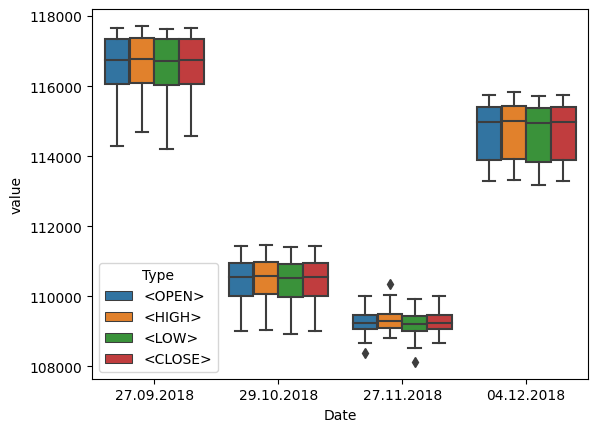

In [54]:
ax = sns.boxplot(x='Date', y='value', hue='Type', data=mdf)
plt.show()